In [140]:
from IPython.display import HTML, Video, clear_output
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
import numpy as np
from scipy import signal
# plt.style.use("classic")
# plt.style.use("bmh")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.grid'] = True

In [ ]:
# print(plt.rcParams.keys())

In [106]:
def showLegend(axs):
	try:
		for ax in axs.flat: ax.legend()
	except TypeError:
		axs.legend()
	except AttributeError:
		axs.legend()

# Дискретное преобразование Фурье

## ДПФ компслексной синусоиды

In [24]:
n_dft = 128
k_0 = 8
time_data = np.arange(n_dft)
sig = np.exp(1j * 2 * np.pi * k_0 * np.arange(n_dft) / n_dft)

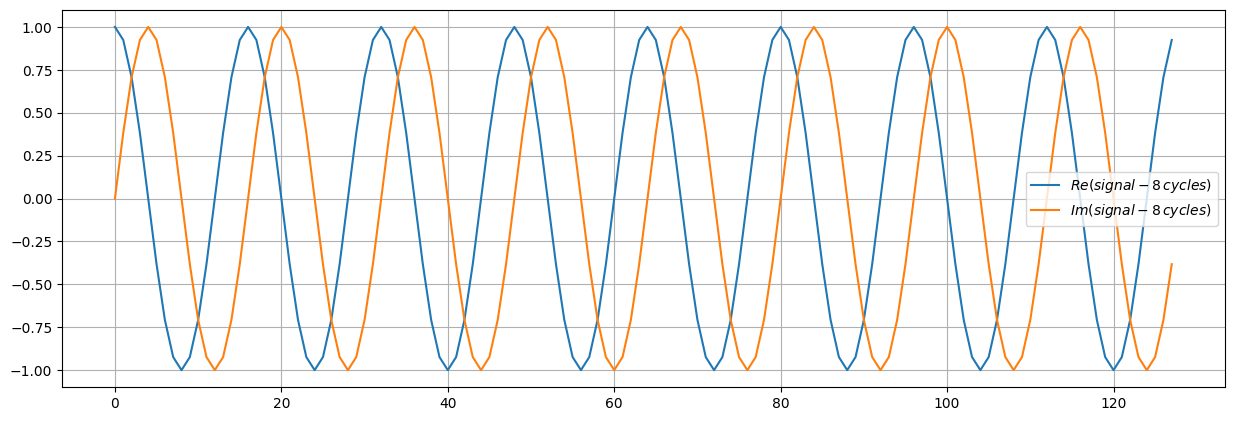

In [67]:
fig, axs = plt.subplots(1, figsize=(15, 5))
axs.plot(time_data, np.real(sig), label='$Re(signal - 8 \, cycles)$')
axs.plot(time_data, np.imag(sig), label='$Im(signal - 8 \, cycles)$')
# axs.legend()
showLegend(axs)
# for ax in axs.flat : ax.legend()
plt.show()

In [58]:
def dft(x):
	n_dft = len(x)
	dft_array = np.zeros(n_dft, dtype=np.complex128)
	for k in range(n_dft):
		compl_sin = np.exp(1j * 2 * np.pi * k * np.arange(n_dft) / n_dft)
		dft_array[k] = np.sum(x * np.conjugate(compl_sin))
	return dft_array

In [59]:
freq_axis = np.arange(n_dft)
phasor = dft(sig)

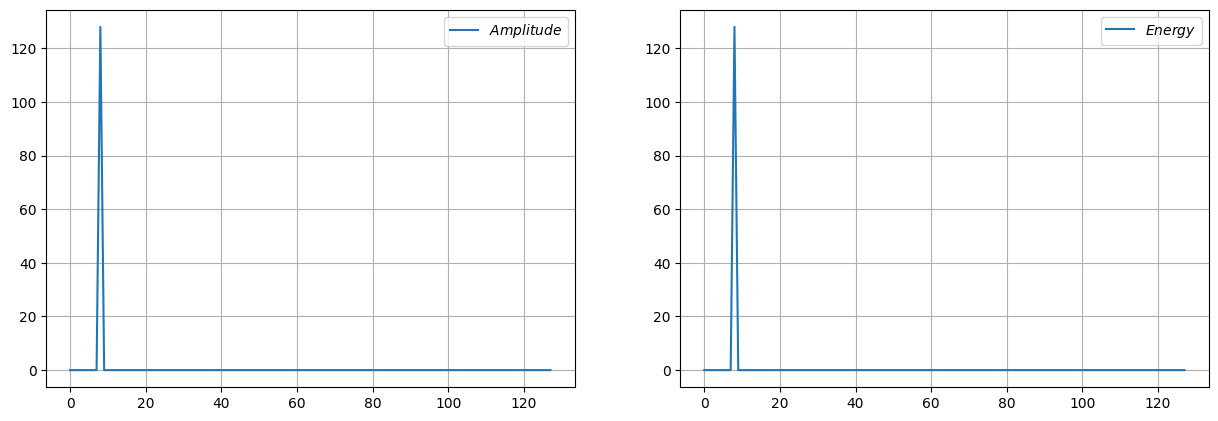

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(freq_axis, np.real(phasor), label='$Amplitude$')
axs[1].plot(freq_axis, np.abs(phasor), label='$Energy$')
showLegend(axs)
plt.show()

In [7]:
print(f'Freq bin with max value: {np.argmax(np.abs(phasor))}')

Freq bin with max value: 8


## ДПФ вещественной синусоиды

In [71]:
time_data = np.arange(n_dft)
sig = np.cos(2 * np.pi * k_0 * np.arange(n_dft) / n_dft)

freq_axis = np.arange(n_dft)
phasor = dft(sig)

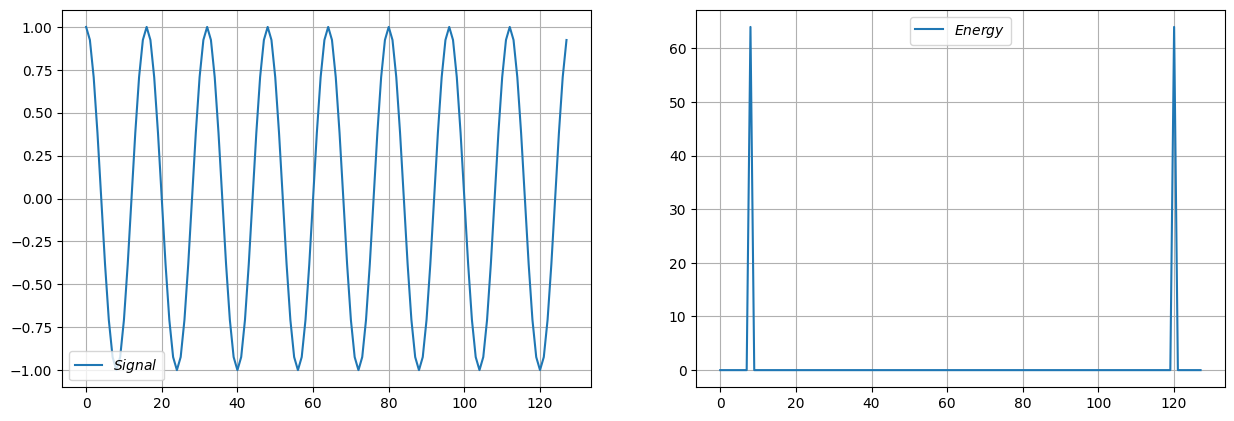

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(time_data, sig, label='$Signal$')
axs[1].plot(freq_axis, np.abs(phasor), label='$Energy$')
showLegend(axs)
plt.show()

Заметим, что пики симметричны относительно нуля, если "склеить" края графика. Для понимания почему так происходит построим для полученной побочной частоты график.

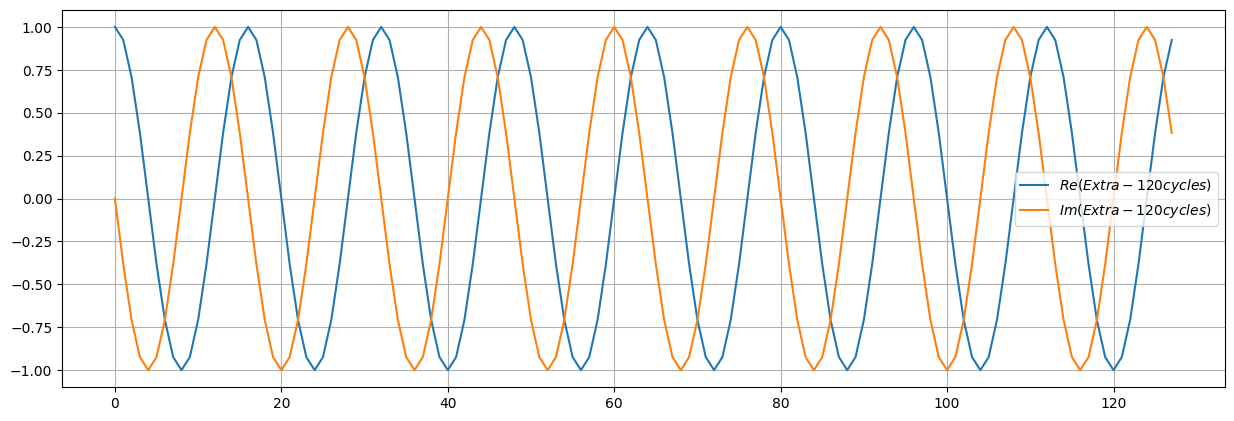

In [75]:
k_extra = 120
sig = np.exp(1j * 2 * np.pi * k_extra * np.arange(n_dft) / n_dft)

fig, axs = plt.subplots(1, figsize=(15, 5))
axs.plot(time_data, np.real(sig), label='$Re(Extra - 120 cycles)$')
axs.plot(time_data, np.imag(sig), label='$Im(Extra - 120 cycles)$')
showLegend(axs)
plt.show()

Он совпадает с графиком для 8 колебаний. Сделаем анимацию, чтобы наглядно увидеть как изменяется график от роста количества колебаний.

In [12]:
def make_wave_animation():
	# kv = np.arange(-n_dft / 2, n_dft / 2)

	fig = plt.figure() 
	axis = plt.axes(xlim =(0, n_dft),
					ylim =(-1, 1)) 
	axis.grid()

	line, = axis.plot([], [], lw = 3)    

	def init():
		line.set_data([], [])
		return line,
	
	def animate(i):
		k_extra = i # kv[i]
		sig = np.exp(1j * 2 * np.pi * k_extra * np.arange(n_dft) / n_dft)
		line.set_data(time_data, np.real(sig))
		return line,
	
	anim = FuncAnimation(fig, animate, init_func = init,
						frames = n_dft, interval = 64, blit = True)
	
	
	anim.save('continuousSineWave.mp4', 
			writer = 'ffmpeg', fps = 15)


# make_wave_animation()

In [13]:
Video('continuousSineWave.mp4', width=400, embed=False, html_attributes="controls loop") # False in VS code

In [76]:
def dft_real(x):
	n_dft = len(x)
	dft_array = np.zeros(n_dft, dtype=np.complex128)
	nv = np.arange(-n_dft/2, n_dft/2)
	kv = np.arange(-n_dft/2, n_dft/2)
	for i, k in enumerate(kv):
		compl_sin = np.exp(1j * 2 * np.pi * k * nv / n_dft)
		dft_array[i] = np.sum(x * np.conjugate(compl_sin))
	return dft_array

In [77]:
time_data = np.arange(n_dft)
sig = np.cos(2 * np.pi * k_0 * np.arange(n_dft) / n_dft)

freq_axis = np.arange(-n_dft/2, n_dft/2)
phasor = dft_real(sig)

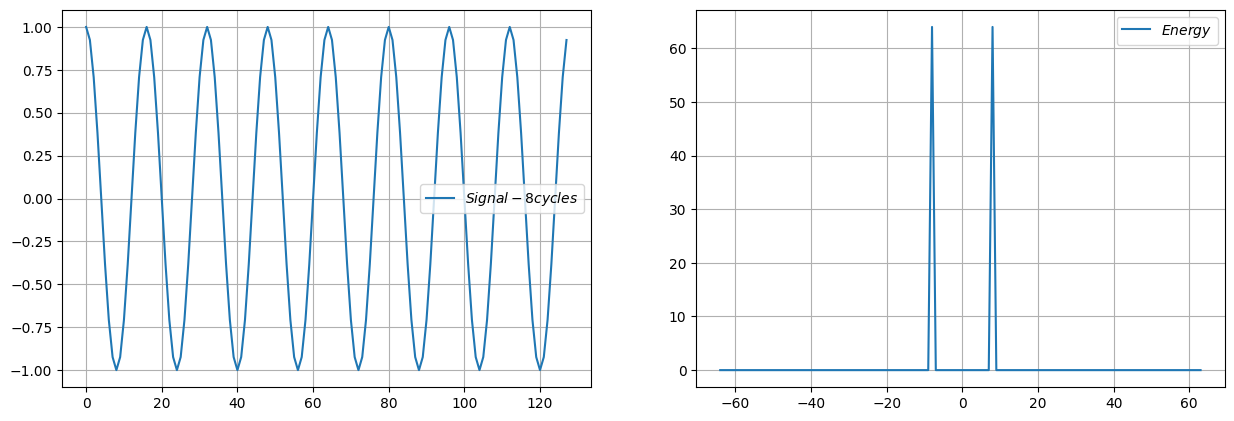

In [78]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(time_data, np.real(sig), label='$Signal - 8 cycles$')
axs[1].plot(freq_axis, np.abs(phasor), label='$Energy$')
showLegend(axs)
plt.show()

# Использование быстрого преобразования Фурье и разворачивание фазы

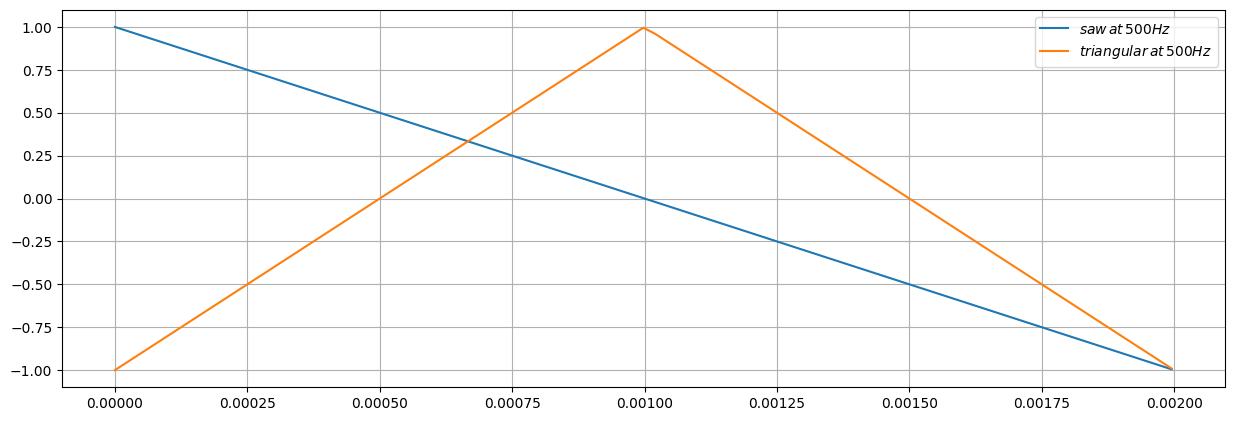

In [195]:
periods = 1
freq = 500
seconds = 1 / freq * periods
samplerate = 44100
samples = int(np.ceil(samplerate * seconds))

# sum of sinwaves [sin(nx)]	--- width=0
# flipped saw [sin(-nx)]	--- width=1
# triangular 				--- width=0.5

time_data = np.arange(0, seconds, 1 / samplerate)
saw = signal.sawtooth(freq * 2 * np.pi * time_data, width=0)
triang = signal.sawtooth(freq * 2 * np.pi * time_data, width=0.5)

fig, axs = plt.subplots(1, figsize=(15, 5))
axs.plot(time_data, saw, label=f'$saw \, at \, {freq} Hz$')
axs.plot(time_data, triang, label=f'$triangular \, at \, {freq} Hz$')
showLegend(axs)
plt.show()

**Без использования оконной функции**

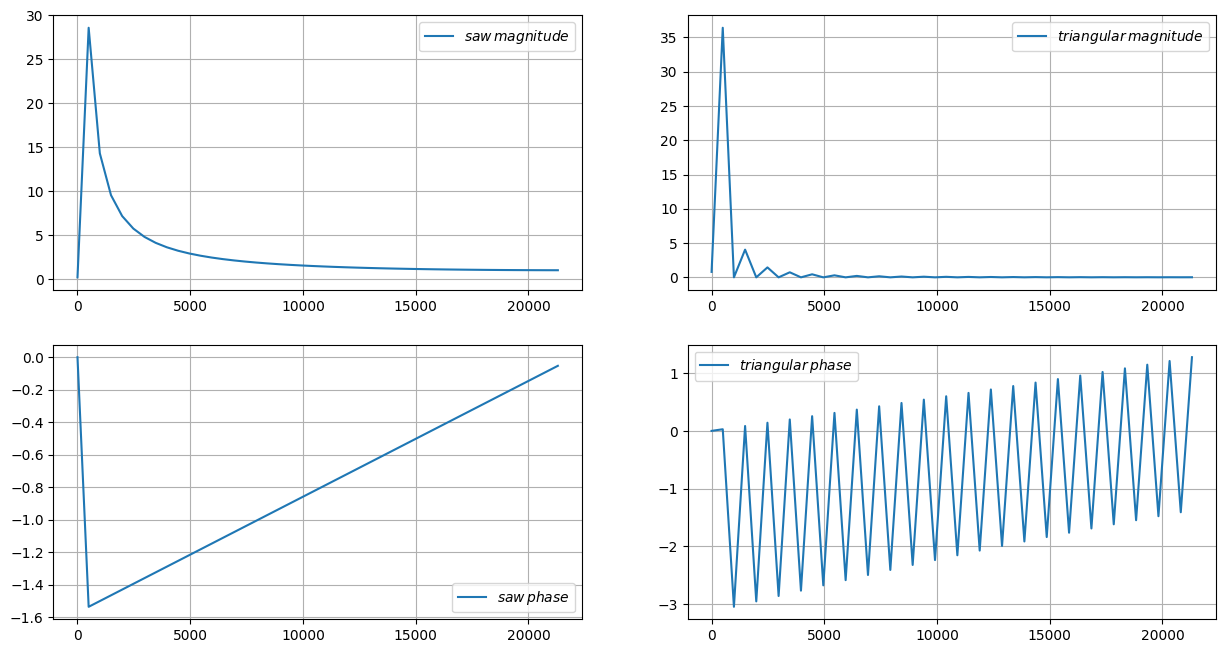

In [186]:
phasor_saw = np.fft.fft(saw)
magnitude_saw = np.abs(phasor_saw)
phase_saw = np.unwrap(np.angle(phasor_saw))

phasor_triang = np.fft.fft(triang)
magnitude_triang = np.abs(phasor_triang)
phase_triang = np.unwrap(np.angle(phasor_triang))

# freq_hz_data = [samplerate * b / len(magnitude_saw) for b in range(len(magnitude_saw) // 2) ]
freq_hz_data = [samplerate * b / samples for b in range(samples // 2) ]

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs[0][0].plot(freq_hz_data, magnitude_saw[:len(magnitude_saw) // 2], label=f'$saw \, magnitude$')
axs[0][1].plot(freq_hz_data, magnitude_triang[:len(magnitude_triang) // 2], label=f'$triangular \, magnitude$')
axs[1][0].plot(freq_hz_data, phase_saw[:len(phase_saw) // 2], label=f'$saw \, phase$')
axs[1][1].plot(freq_hz_data, phase_triang[:len(phase_triang) // 2], label=f'$triangular \, phase$')
showLegend(axs)
plt.show()

In [187]:
print(f'Max amp of freq bin: {np.argmax(magnitude_saw[:len(magnitude_saw) // 2])}')
freq_in_hz = samplerate * np.argmax(magnitude_saw[:len(magnitude_saw) // 2]) / len(magnitude_saw)
print(f'Max amp of freq: {freq_in_hz} Hz')

Max amp of freq bin: 1
Max amp of freq: 495.5056179775281 Hz


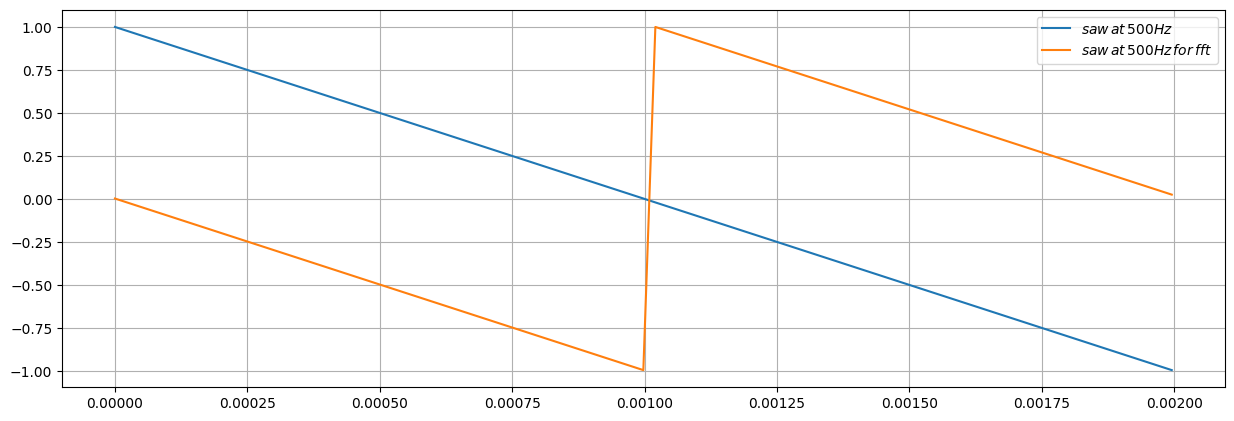

In [188]:
# если получен период, не симметричный относительно 0 по времени
# нужно получить симметричные данные - тогда фаза будет около нуля
# 
# я не особо понял как это получается, но, вроде как это именно
# от симметрии зависит
# то есть, значение 1 для треугольной волны должно находиться в нуле
hM1 = int(np.floor((samples + 1) / 2)) # middle (destination)
hM2 = int(np.floor((samples) / 2)) # middle (source)


saw_fft_buffer = np.zeros(len(saw))
saw_fft_buffer[:hM1] = saw[hM2:]
saw_fft_buffer[hM1:] = saw[:hM2]

triang_fft_buffer = np.zeros(len(triang))
triang_fft_buffer[:hM1] = triang[hM2:]
triang_fft_buffer[hM1:] = triang[:hM2]

fig, axs = plt.subplots(1, figsize=(15, 5))
axs.plot(time_data, saw, label=f'$saw \, at \, {freq} Hz$')
axs.plot(time_data, saw_fft_buffer, label=f'$saw \, at \, {freq} Hz \, for \, fft$')
showLegend(axs)
plt.show()

Orig: [-0.9954648526077096, 1.0]
flipped: [0.02494331065759643, 0.002267573696145194]


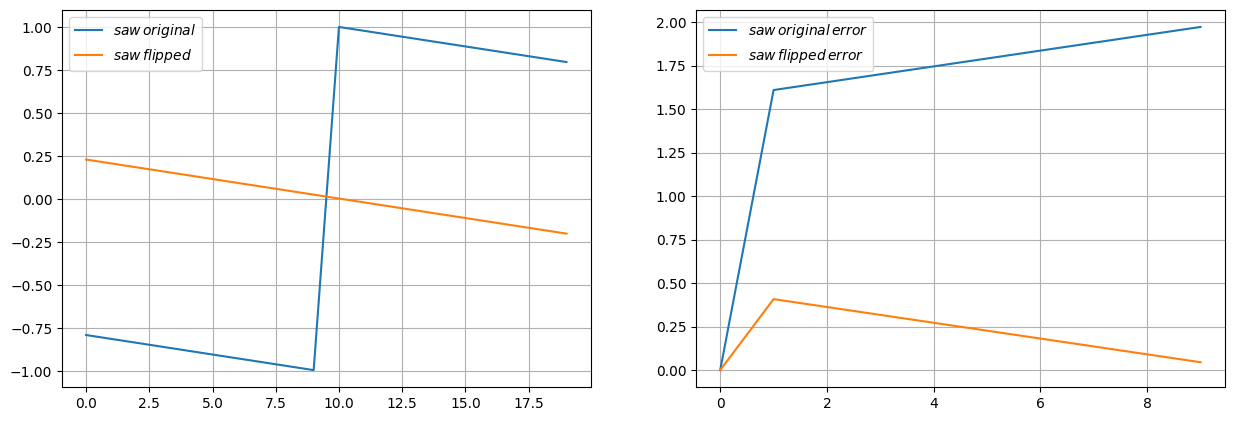

In [189]:
# symmetry center check

sample_range = 10

saw_list = []
for i in range(sample_range): saw_list.append(saw[-sample_range+i])
for i in range(sample_range): saw_list.append(saw[i])

saw_fft_list = []
for i in range(sample_range): saw_fft_list.append(saw_fft_buffer[-sample_range+i])
for i in range(sample_range): saw_fft_list.append(saw_fft_buffer[i])

print(f'Orig: {saw_list[sample_range-1:sample_range+1]}')
print(f'flipped: {saw_fft_list[sample_range-1:sample_range+1]}')

# error check (shows if is symmetric)
sse = [np.abs(saw_list[i] - saw_list[-i]) for i in range(sample_range)]
sfse = [np.abs(saw_fft_list[i] - saw_fft_list[-i]) for i in range(sample_range)]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(saw_list, label=f'$saw \, original$')
axs[0].plot(saw_fft_list, label=f'$saw \, flipped$')
axs[1].plot(sse, label=f'$saw \, original \, error$')
axs[1].plot(sfse, label=f'$saw \, flipped \, error$')
showLegend(axs)
plt.show()

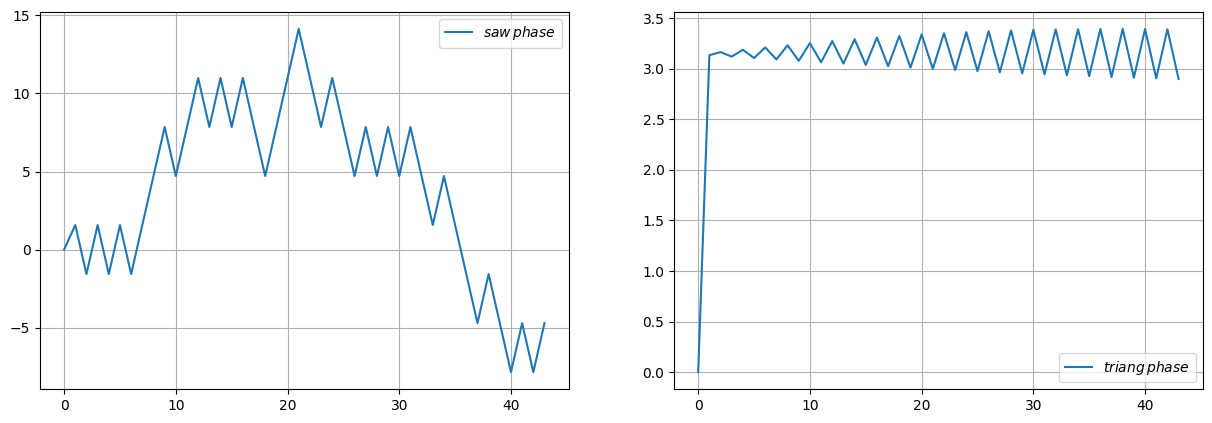

In [190]:
phasor_saw = np.fft.fft(saw_fft_buffer)
magnitude_saw = np.abs(phasor_saw)
phase_saw = np.unwrap(np.angle(phasor_saw))

phasor_triang = np.fft.fft(triang_fft_buffer)
magnitude_triang = np.abs(phasor_triang)
phase_triang = np.unwrap(np.angle(phasor_triang))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(phase_saw[:len(phase_saw) // 2], label=f'$saw \, phase$')
axs[1].plot(phase_triang[:len(phase_triang) // 2], label=f'$triang \, phase$')
showLegend(axs)
plt.show()

Как можно заметить, ничего глобального с фазой не произошло для треугольной волны. Так что непончтно что имел ввиду автор. Возможно, если попробовать генерировать волну по семплам и укладывать периодв некоторое количество сэмплов, то что-то и получится.

**С применением оконной функции**

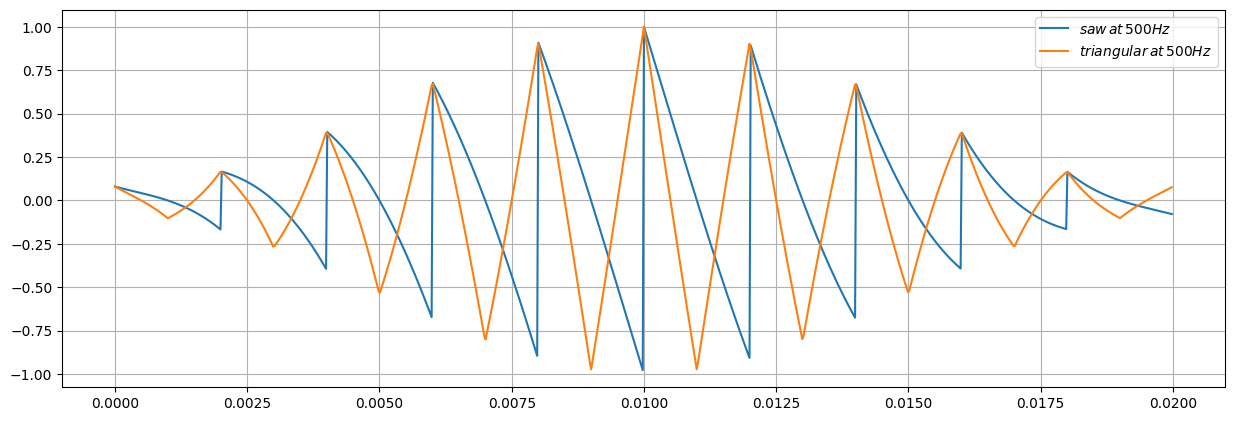

In [193]:
periods = 10 # more periods for window function
freq = 500
seconds = 1 / freq * periods
samplerate = 44100
samples = int(np.ceil(samplerate * seconds))

time_data = np.arange(0, seconds, 1 / samplerate)
saw = signal.sawtooth(freq * 2 * np.pi * time_data, width=0) * np.hamming(len(time_data))
triang = -signal.sawtooth(freq * 2 * np.pi * time_data, width=0.5) * np.hamming(len(time_data))

fig, axs = plt.subplots(1, figsize=(15, 5))
axs.plot(time_data, saw, label=f'$saw \, at \, {freq} Hz$')
axs.plot(time_data, triang, label=f'$triangular \, at \, {freq} Hz$')
showLegend(axs)
plt.show()

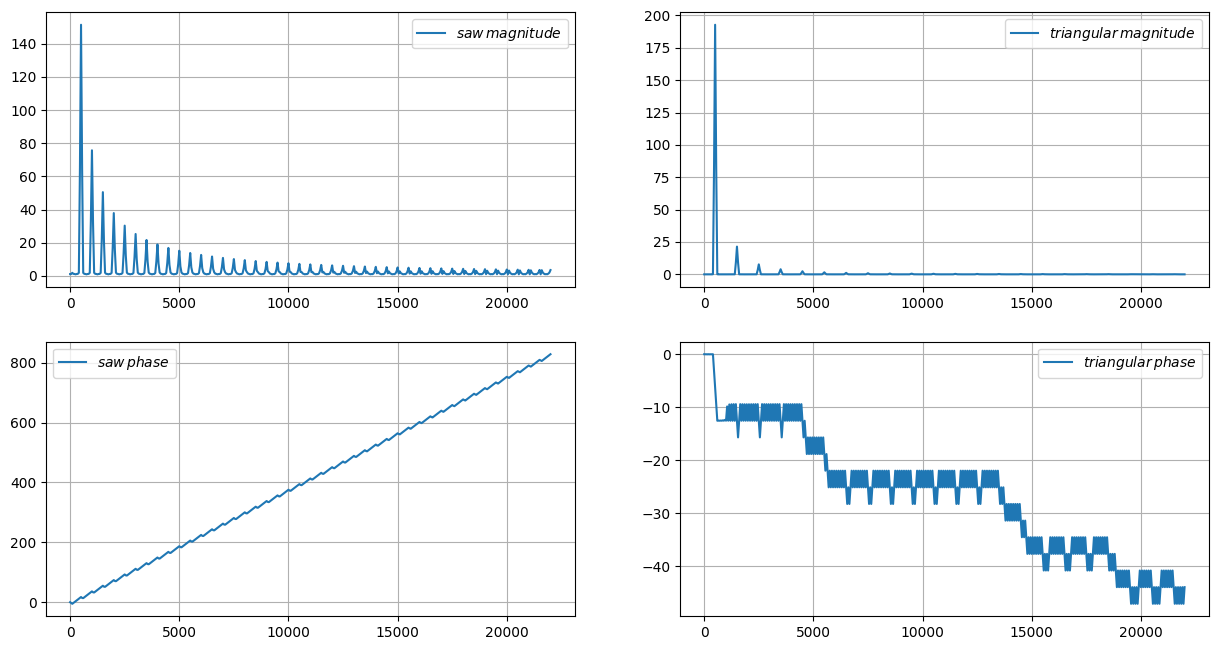

In [194]:
phasor_saw = np.fft.fft(saw)
magnitude_saw = np.abs(phasor_saw)
phase_saw = np.unwrap(np.angle(phasor_saw))

phasor_triang = np.fft.fft(triang)
magnitude_triang = np.abs(phasor_triang)
phase_triang = np.unwrap(np.angle(phasor_triang))

# freq_hz_data = [samplerate * b / len(magnitude_saw) for b in range(len(magnitude_saw) // 2) ]
freq_hz_data = [samplerate * b / samples for b in range(samples // 2) ]

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs[0][0].plot(freq_hz_data, magnitude_saw[:len(magnitude_saw) // 2], label=f'$saw \, magnitude$')
axs[0][1].plot(freq_hz_data, magnitude_triang[:len(magnitude_triang) // 2], label=f'$triangular \, magnitude$')
axs[1][0].plot(freq_hz_data, phase_saw[:len(phase_saw) // 2], label=f'$saw \, phase$')
axs[1][1].plot(freq_hz_data, phase_triang[:len(phase_triang) // 2], label=f'$triangular \, phase$')
showLegend(axs)
plt.show()